In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.datasets import fashion_mnist   

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = tf.expand_dims(x_train, -1)     # from 28 x 28 to 28 x 28 x 1 
x_train = tf.divide(x_train, 255)         # Normalize 
y_train = tf.one_hot(y_train , depth=10)  # Make target One-Hot

x_test = tf.expand_dims(x_test, -1)       # from 28 x 28 to 28 x 28 x 1 
x_test = tf.divide(x_test, 255)           # Normalize
y_test = tf.one_hot(y_test , depth=10)    # Make target One-Hot
 
x_train.shape, y_train.shape, x_test.shape, y_test.shape
(tf.TensorShape([60000, 28, 28, 1]),
 tf.TensorShape([60000, 10]),
 tf.TensorShape([10000, 28, 28, 1]),
 tf.TensorShape([10000, 10]))

(TensorShape([60000, 28, 28, 1]),
 TensorShape([60000, 10]),
 TensorShape([10000, 28, 28, 1]),
 TensorShape([10000, 10]))

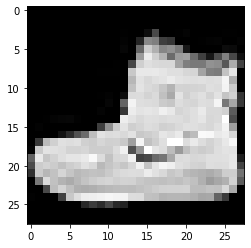

In [16]:
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.show()

In [17]:
model = Sequential() 
model.add(Conv2D(16, kernel_size=(3,3), input_shape = (28,28,1)))  
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))  
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))  
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))  
model.add(GlobalAveragePooling2D())     
model.add(Dropout(0.5))         
model.add(Dense(10, activation=tf.nn.softmax))       
model.summary()

# Unlike you I use categorical_crossentropy
# as because I one_hot encoded my y_train and y_test
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=256, 
             epochs=15, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [18]:
# a preprocess function 
def infer_prec(img, img_size):
    img = tf.expand_dims(img, -1)       # from 28 x 28 to 28 x 28 x 1 
    img = tf.divide(img, 255)           # normalize 
    img = tf.image.resize(img,          # resize acc to the input
             [img_size, img_size])
    img = tf.reshape(img,               # reshape to add batch dimension 
            [1, img_size, img_size, 1])
    return img 

(225, 225)


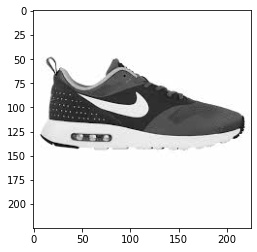

(1, 28, 28, 1)


In [37]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/ANTHONY/Desktop/CSV&XLSX/shoe.jpg', 0)   # read image as gray scale    
print(img.shape)   # (300, 231)

plt.imshow(img, cmap="gray")
plt.show()

img = infer_prec(img, 28)  # call preprocess function 
print(img.shape)   # (1, 28, 28, 1)

In [38]:
y_pred = model.predict(img)
y_pred 

array([[9.9265508e-02, 8.2123259e-09, 2.7465767e-01, 8.1704078e-05,
        8.9867541e-07, 1.6487756e-07, 1.6689105e-03, 1.0713762e-06,
        6.2389642e-01, 4.2764339e-04]], dtype=float32)

In [39]:
tf.argmax(y_pred, axis=-1).numpy() 

array([8], dtype=int64)